In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("../data/raw/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class'>

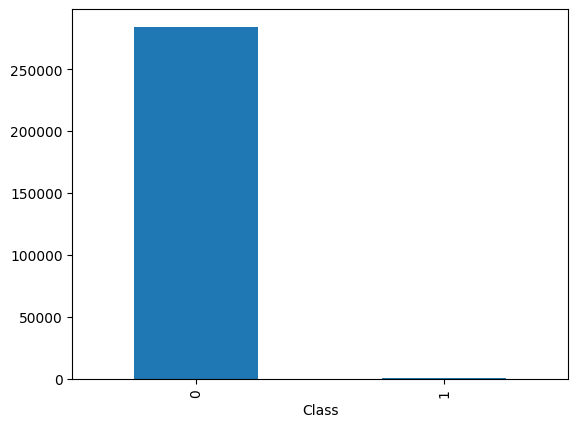

In [9]:
df["Class"].value_counts().plot(kind="bar")

In [10]:
df_minority = df[df["Class"] == 1]
df_majority = df[df["Class"] == 0]

# Upsampling

In [13]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority,replace=True,n_samples=len(df_majority),random_state=123)

In [15]:
df_minority.shape

(492, 31)

In [16]:
df_minority_upsampled.shape

(284315, 31)

In [17]:
import seaborn as sns

In [21]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [25]:
df_upsampled=pd.concat([df_majority, df_minority_upsampled])

In [27]:
df_upsampled["Class"].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

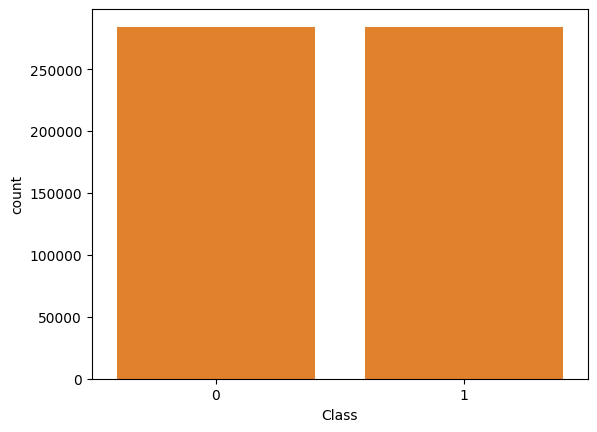

In [29]:
sns.countplot(x="Class",data=df)
sns.countplot(x="Class",data=df_upsampled)

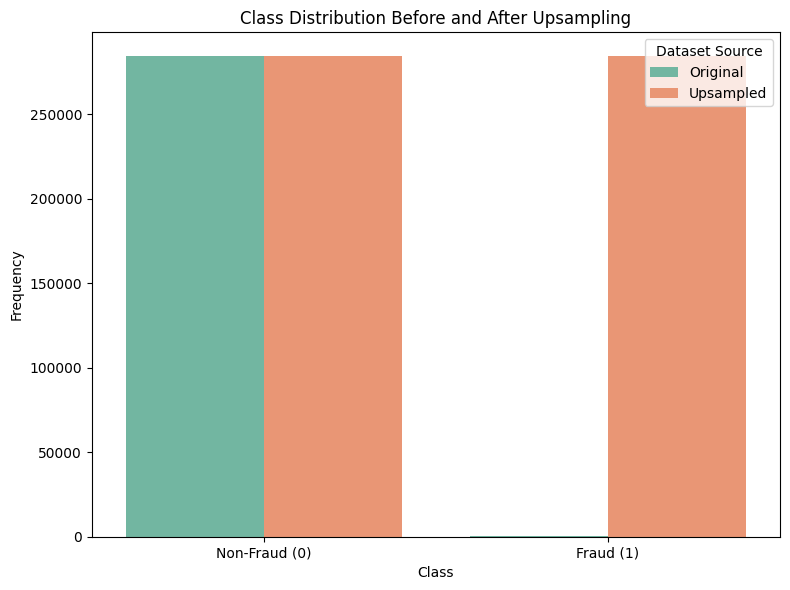

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add source labels
df['Source'] = 'Original'
df_upsampled['Source'] = 'Upsampled'

# Combine the datasets
df_combined = pd.concat([df, df_upsampled])

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', hue='Source', data=df_combined, palette='Set2')
plt.title('Class Distribution Before and After Upsampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.legend(title='Dataset Source')
plt.tight_layout()
plt.savefig('comparison_class_distribution.png')
plt.show()

In [33]:
df_upsampled.to_csv("../data/processed/creditcard_upsampled.csv", index=False)    

# Downsample

In [34]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [44]:
int(df["Class"].value_counts().idxmin())

1

In [45]:
df_majority = df[df["Class"]==int(df["Class"].value_counts().idxmax())]


In [46]:
df_minority=df[df["Class"]==int(df["Class"].value_counts().idxmin())]

In [48]:
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=123)

In [49]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [50]:
df_downsampled["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [51]:
df_downsampled.to_csv("../data/processed/creditcard_downsampled.csv", index=False)